Using Ensemble Learning Methods to classify target stars.

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/CS464_Project/baseline_df.csv')
df

,kepid,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_992,flux_993,flux_994,flux_995,flux_996,flux_997,flux_998,flux_999,flux_1000,label
0,10797460.0,0.999956,0.999976,0.999927,0.999900,0.999946,0.999974,0.999817,1.000073,0.999805,...,0.999985,1.000216,0.999849,0.999988,0.999935,0.999952,1.000010,1.000180,0.999846,1.0
1,10848459.0,1.000090,NaN,0.999933,1.000010,1.000484,1.000211,0.999942,1.000306,1.000175,...,1.000171,1.000071,1.000015,1.000282,1.000190,0.999994,1.000019,1.000038,1.000262,0.0
2,10797460.0,1.000086,1.000074,0.999959,1.000018,1.000172,0.999981,0.999912,1.000094,1.000037,...,1.000001,0.999999,0.999876,1.000060,0.999987,0.999778,0.999984,1.000067,0.999960,1.0
3,6721123.0,0.999984,1.000008,0.999981,0.999999,0.999918,0.999998,0.999958,0.999988,0.999988,...,1.000084,0.999993,1.000052,1.000010,0.999980,0.999998,1.000053,0.999989,0.999980,0.0
4,10811496.0,1.000903,1.001195,1.000961,1.000900,1.001421,1.001033,1.001075,1.000885,1.001231,...,1.000613,1.000885,1.000414,1.000970,1.000982,1.001035,1.000859,1.000877,1.001111,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,4908495.0,0.998747,0.998346,1.000972,0.993875,1.001994,0.993139,1.001183,0.989094,1.006907,...,1.001793,0.990140,1.002741,0.989490,1.005001,0.990013,1.007279,0.989272,1.000384,0.0
3996,7175184.0,1.000020,1.000018,1.000061,0.999953,1.000035,1.000002,1.000043,1.000016,1.000021,...,1.000033,1.000018,0.999956,1.000034,1.000031,1.000029,0.999980,1.000068,1.000035,1.0
3997,4912589.0,1.000444,0.999989,1.000164,1.000698,0.999883,0.999882,1.000409,0.999808,0.999825,...,1.000378,0.999999,1.000452,1.000298,0.999903,1.000395,1.000193,1.000003,1.000396,0.0
3998,8494142.0,0.999978,0.999963,0.999992,0.999961,0.999956,0.999985,0.999988,1.000016,0.999993,...,1.000022,0.999984,1.000027,1.000030,1.000011,1.000012,0.999953,0.999992,0.999985,1.0


In [4]:
df_fill = df.fillna(df.mean()) # handle missing values

X = df_fill.drop(columns=['kepid', 'label'])
y = df_fill['label']

X.tail(9)

,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,flux_10,...,flux_991,flux_992,flux_993,flux_994,flux_995,flux_996,flux_997,flux_998,flux_999,flux_1000
3991,1.000384,0.999874,1.000209,0.999835,1.001489,1.000663,0.999104,0.998924,1.000861,1.000150,...,1.000748,0.999829,0.998737,1.000422,1.000447,0.999452,1.000423,1.000519,0.998280,0.999587
3992,1.000008,0.999968,0.999883,0.999932,0.999908,0.999925,0.999907,0.999889,0.999897,0.999909,...,1.000239,1.000116,0.999983,1.000144,1.000109,1.000043,1.000034,1.000095,0.999988,1.000027
3993,1.001316,1.001953,1.003438,1.004554,1.004643,1.004634,1.004852,1.005980,1.005495,1.003788,...,1.001224,1.004544,0.998662,0.999766,0.999669,0.998783,0.998228,0.998725,1.000902,0.998680
3994,1.000005,0.999966,1.000003,0.999997,1.000017,0.999933,1.000031,0.999987,0.999943,1.000025,...,0.999959,1.000020,0.999989,0.999986,0.999956,0.999955,0.999953,1.000028,0.999964,0.999998
3995,0.998747,0.998346,1.000972,0.993875,1.001994,0.993139,1.001183,0.989094,1.006907,0.991038,...,0.994391,1.001793,0.990140,1.002741,0.989490,1.005001,0.990013,1.007279,0.989272,1.000384
3996,1.000020,1.000018,1.000061,0.999953,1.000035,1.000002,1.000043,1.000016,1.000021,0.999982,...,1.000058,1.000033,1.000018,0.999956,1.000034,1.000031,1.000029,0.999980,1.000068,1.000035
3997,1.000444,0.999989,1.000164,1.000698,0.999883,0.999882,1.000409,0.999808,0.999825,1.000181,...,1.000303,1.000378,0.999999,1.000452,1.000298,0.999903,1.000395,1.000193,1.000003,1.000396
3998,0.999978,0.999963,0.999992,0.999961,0.999956,0.999985,0.999988,1.000016,0.999993,1.000013,...,0.999998,1.000022,0.999984,1.000027,1.000030,1.000011,1.000012,0.999953,0.999992,0.999985
3999,0.999927,0.999789,1.000140,0.999850,1.000005,0.999919,1.000126,0.999963,1.000020,0.999899,...,1.000354,0.999825,1.000136,0.999810,1.000091,0.999737,0.999896,0.999679,0.999864,0.999992


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=34
)

print(f'X_train.shape: {X_train.shape}')
print(f'X_test.shape: {X_test.shape}')

X_train.shape: (3200, 1000)
X_test.shape: (800, 1000)


In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Model: Scikit Learn's RandomForestClassifier

In [7]:
# Create RandomForestClassifier
clf = RandomForestClassifier(max_depth=23, # maximum depth of the tree
                             n_estimators=100, # n trees in the forest
                             min_samples_leaf=1, # minimum n samples requred to be at a leaf node
                             max_features='sqrt', # n features to consider when looking for best split
                             random_state=34, # randomness in sampling of features to consider when looking for best split at each node
                             verbose=1)

# Train
clf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    5.1s


RandomForestClassifier(max_depth=23, random_state=34, verbose=1)

In [8]:
# Make preditions on the training set
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Make predictions on the validation set
y_val_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_val_pred)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [9]:
test_accuracy

0.7975

In [10]:
train_accuracy

1.0

Confusion Matrix


<Axes: xlabel='Predicted', ylabel='Actual'>

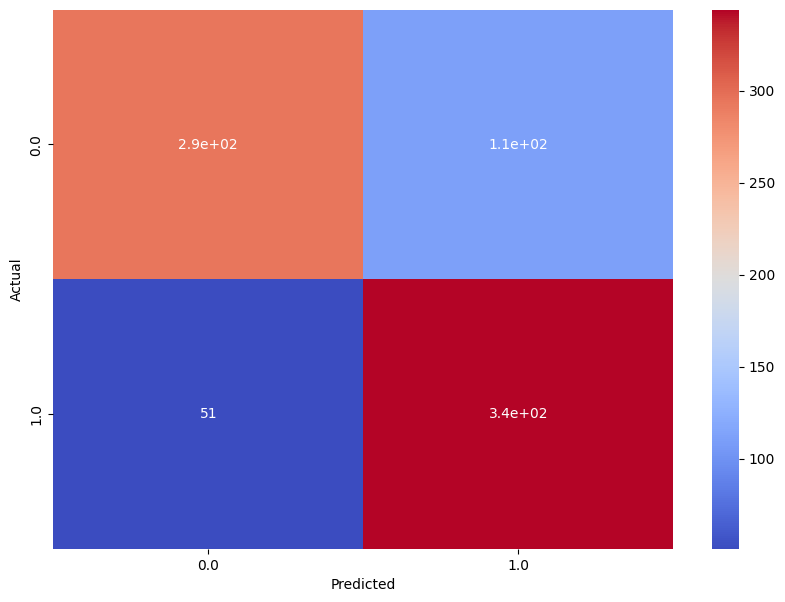

In [11]:
from sklearn.metrics import confusion_matrix

print('Confusion Matrix')
matrix = confusion_matrix(y_test, y_val_pred)
df_cm = pd.DataFrame(matrix, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, cmap='coolwarm', annot=True)

In [12]:
from sklearn.metrics import classification_report
print(f'Classification Report: {clf}]\n')
print(f'{classification_report(y_test, y_val_pred)}')

Classification Report: RandomForestClassifier(max_depth=23, random_state=34, verbose=1)]

              precision    recall  f1-score   support

         0.0       0.85      0.73      0.78       405
         1.0       0.76      0.87      0.81       395

    accuracy                           0.80       800
   macro avg       0.80      0.80      0.80       800
weighted avg       0.80      0.80      0.80       800



## Hyperparameter Tuning
- train_accuracy of 1 indicates overfitting.

<function matplotlib.pyplot.show(close=None, block=None)>

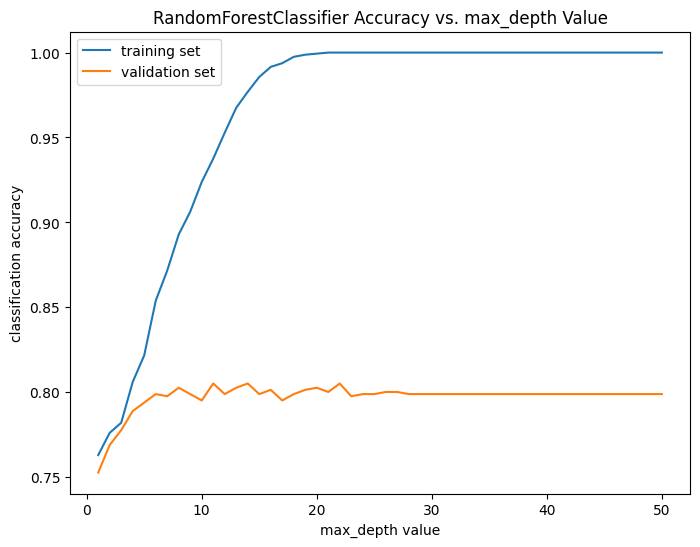

In [13]:
max_depth_values = range(1, 51)
train_accuracy_scores_md = []
test_accuracy_scores_md = []

for max_depth in max_depth_values:
  clf = RandomForestClassifier(max_depth=max_depth, random_state=34)
  clf.fit(X_train, y_train)

  # make predictions on the training set
  y_train_pred = clf.predict(X_train)

  train_accuracy_scores_md.append(accuracy_score(y_train, y_train_pred))

  # make predictions on the test set
  y_test_pred = clf.predict(X_test)
  test_accuracy_scores_md.append(accuracy_score(y_test, y_test_pred))

plt.figure(figsize = (8, 6))
plt.plot(max_depth_values, train_accuracy_scores_md, linestyle='-', label='training set')
plt.plot(max_depth_values, test_accuracy_scores_md, linestyle='-', label='validation set')
plt.title('RandomForestClassifier Accuracy vs. max_depth Value')
plt.xlabel('max_depth value')
plt.ylabel('classification accuracy')
plt.legend()
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

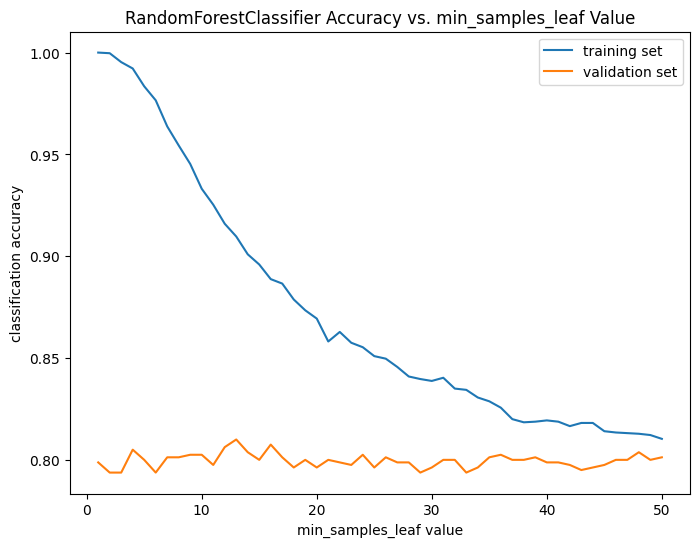

In [14]:
min_samples_leaf_values = range(1, 51)
train_accuracy_scores_leaf = []
test_accuracy_scores_leaf = []

for min_samples_leaf in min_samples_leaf_values:
  clf = RandomForestClassifier(min_samples_leaf=min_samples_leaf, random_state=34)
  clf.fit(X_train, y_train)

  # make predictions on the training set
  y_train_pred = clf.predict(X_train)

  train_accuracy_scores_leaf.append(accuracy_score(y_train, y_train_pred))

  # make predictions on the test set
  y_test_pred = clf.predict(X_test)
  test_accuracy_scores_leaf.append(accuracy_score(y_test, y_test_pred))

plt.figure(figsize = (8, 6))
plt.plot(min_samples_leaf_values, train_accuracy_scores_leaf, linestyle='-', label='training set')
plt.plot(min_samples_leaf_values, test_accuracy_scores_leaf, linestyle='-', label='validation set')
plt.title('RandomForestClassifier Accuracy vs. min_samples_leaf Value')
plt.xlabel('min_samples_leaf value')
plt.ylabel('classification accuracy')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

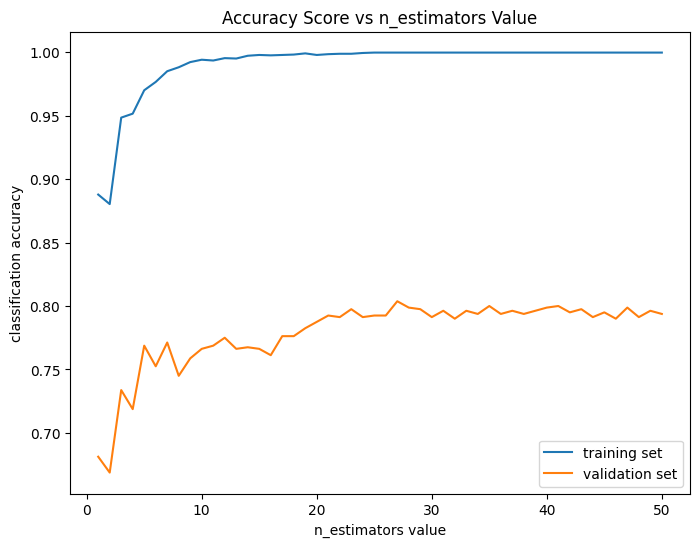

In [15]:
n_estimators_values = range(1, 51)
train_accuracy_scores_est = []
test_accuracy_scores_est = []

for n_estimators in n_estimators_values:
  clf = RandomForestClassifier(n_estimators=n_estimators, random_state=34)
  clf.fit(X_train, y_train)

  y_train_pred = clf.predict(X_train)
  train_accuracy_scores_est.append(accuracy_score(y_train, y_train_pred))

  y_test_pred = clf.predict(X_test)
  test_accuracy_scores_est.append(accuracy_score(y_test, y_test_pred))

plt.figure(figsize = (8, 6))
plt.plot(n_estimators_values, train_accuracy_scores_est, linestyle='-', label='training set')
plt.plot(n_estimators_values, test_accuracy_scores_est, linestyle='-', label='validation set')
plt.title('Accuracy Score vs n_estimators Value')
plt.xlabel('n_estimators value')
plt.ylabel('classification accuracy')
plt.legend()
plt.show

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


<function matplotlib.pyplot.show(close=None, block=None)>

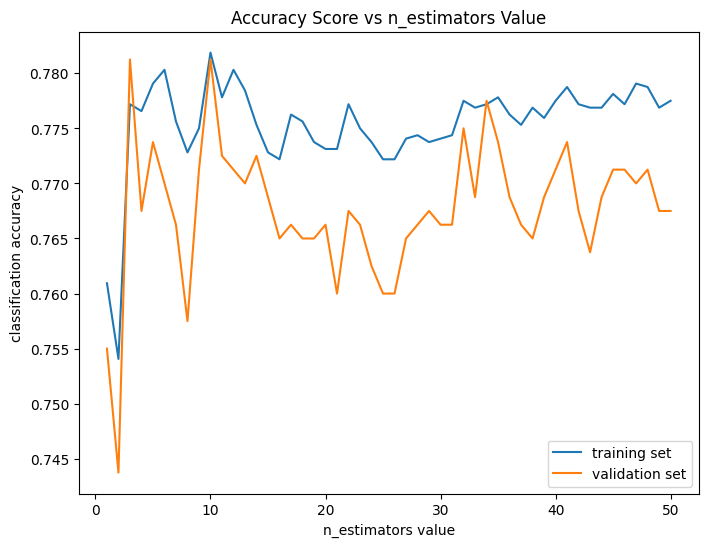

In [19]:
# Using the best results from the previous steps
train_accuracy_scores_est = []
test_accuracy_scores_est = []

for n_estimators in n_estimators_values:
  # Create RandomForestClassifier
  clf = RandomForestClassifier(max_depth=3, # maximum depth of the tree
                             n_estimators=n_estimators, # n trees in the forest
                             min_samples_leaf=50, # minimum n samples requred to be at a leaf node
                             max_features='sqrt', # n features to consider when looking for best split
                             random_state=34, # randomness in sampling of features to consider when looking for best split at each node
                             verbose=1)
  clf.fit(X_train, y_train)

  y_train_pred = clf.predict(X_train)
  train_accuracy_scores_est.append(accuracy_score(y_train, y_train_pred))

  y_test_pred = clf.predict(X_test)
  test_accuracy_scores_est.append(accuracy_score(y_test, y_test_pred))

plt.figure(figsize = (8, 6))
plt.plot(n_estimators_values, train_accuracy_scores_est, linestyle='-', label='training set')
plt.plot(n_estimators_values, test_accuracy_scores_est, linestyle='-', label='validation set')
plt.title('Accuracy Score vs n_estimators Value')
plt.xlabel('n_estimators value')
plt.ylabel('classification accuracy')
plt.legend()
plt.show

In [23]:
# Create RandomForestClassifier
model = RandomForestClassifier(max_depth=3, # maximum depth of the tree
                             n_estimators=10, # n trees in the forest
                             min_samples_leaf=50, # minimum n samples requred to be at a leaf node
                             max_features='sqrt', # n features to consider when looking for best split
                             random_state=34, # randomness in sampling of features to consider when looking for best split at each node
                             verbose=1)

# Train
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=50, n_estimators=10,
                       random_state=34, verbose=1)

In [24]:
# Make preditions on the training set
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Make predictions on the validation set
y_val_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_val_pred)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [26]:
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Train Accuracy: 0.7775
Test Accuracy: 0.7675
